<a href="https://colab.research.google.com/github/sunny722122/capitalstone_Proj_malaria_detection/blob/main/Final_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------------------------------------------
# **Malaria Detection**
---------------------------------------------------------------------------------------

-------------------
## **Context**
-------------------

Malaria is a contagious disease caused by Plasmodium parasites that are transmitted to humans through the bites of infected female Anopheles mosquitoes. The parasites enter the blood and begin damaging red blood cells (RBCs) that carry oxygen, which can result in respiratory distress and other complications. The lethal parasites can stay alive for more than a year in a person’s body without showing any symptoms. Therefore, late treatment can cause complications and could even be fatal. Almost 50% of the world’s population is in danger from malaria. There were more than 229 million malaria cases and 400,000 malaria-related deaths reported over the world in 2019. Children under 5 years of age are the most vulnerable population group affected by malaria; in 2019 they accounted for 67% of all malaria deaths worldwide.
Traditional diagnosis of malaria in the laboratory requires careful inspection by an experienced professional to discriminate between healthy and infected red blood cells. It is a tedious, time-consuming process, and the diagnostic accuracy (which heavily depends on human expertise) can be adversely impacted by inter-observer variability.
An automated system can help with the early and accurate detection of malaria. Applications of automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) have consistently shown higher accuracy than manual classification. It would therefore be highly beneficial to propose a method that performs malaria detection using Deep Learning Algorithms.

---------------------
## **Objective**
---------------------

Build an efficient computer vision model to detect malaria. The model should identify whether the image of a red blood cell is that of one infected with malaria or not, and classify the same as parasitized or uninfected, respectively.

---------------------
## **Key questions**
---------------------

*   How to improve the diagnosis speed to get patient early treatment?
*   How to get the dianose result more reliable and accurate?

---------------------
## **Problem Formulation**
---------------------

Need to use automation method to get the diagnosis faster and improve the accuracy

-------------------
## **Dataset**
-------------------

The dataset are colored images of red blood cells that contain parasitized and uninfected instances, where:
● The parasitized cells contain the Plasmodium parasite
● The uninfected cells are free of the Plasmodium parasites but could contain other impurities

Mounting the Google drive.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


prepare packages

In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing the necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
import zipfile
from PIL import Image
# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow_addons as tfa
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, LeakyReLU,GlobalAveragePooling2D,Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

## **Load the dataset**

- Let us now load the dataset that is available as a .zip file.
- Split the data into the train and the test dataset.

In [5]:
import imghdr
file_name='/content/drive/MyDrive/cell_images.zip'
with zipfile.ZipFile(file_name, 'r') as zip_ref:
  zip_ref.extractall()

In [6]:
picture_size = 64
channels=3
folder_path = "cell_images/"

## **Visualizing Malaria showing parasitized**

First, Visualizing Malaria images that exhibit the parasitized.

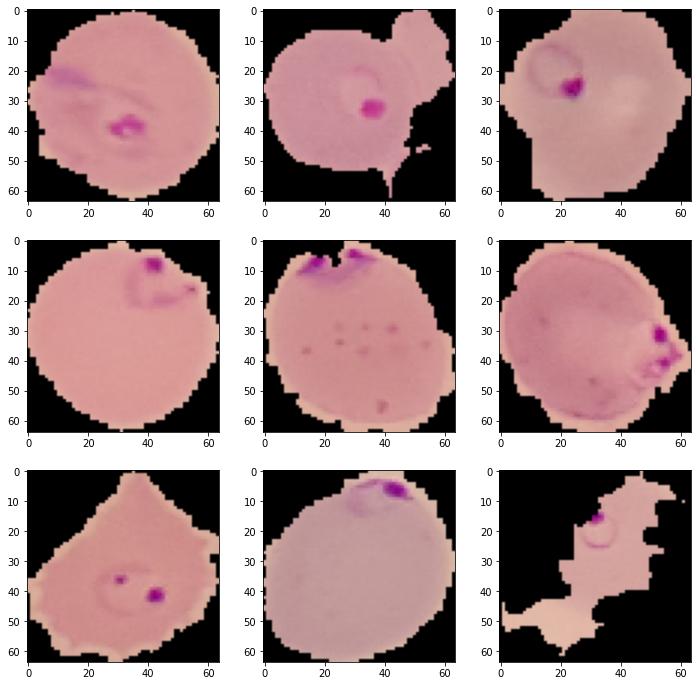

In [7]:
malaria_presence = 'parasitized'

# The following code plots the first nine images in the folder 'yes'.
plt.figure(figsize = (12, 12)) 

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path +'train/' + malaria_presence + "/" +
                  os.listdir(folder_path + 'train/' + malaria_presence)[i],target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

## **Visualizing Malaria images without infections**

Then let's see what the cell images that healthy look like.

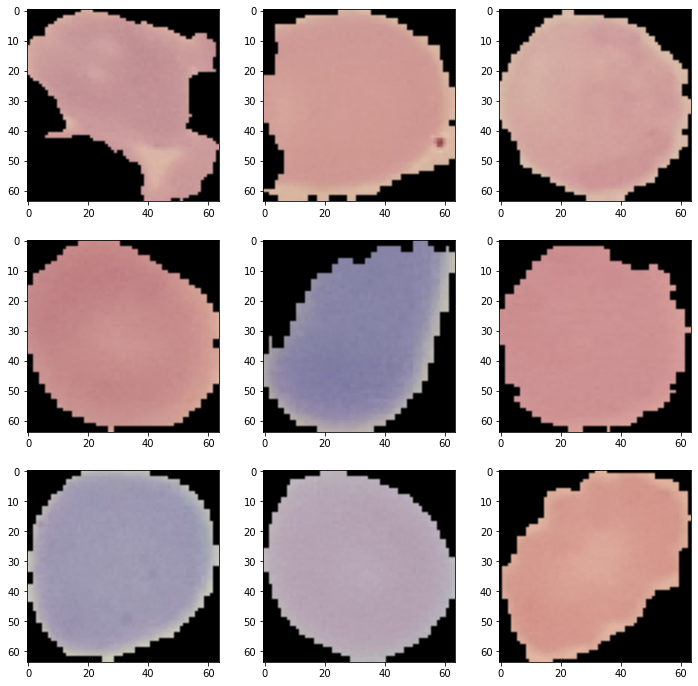

In [8]:
malaria_presence = 'uninfected'

# The following code plots the first nine images in the folder 'no'.
plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + 'train/' + malaria_presence + "/" +
                  os.listdir(folder_path + 'train/' + malaria_presence)[i],target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

In [9]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [10]:
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [11]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [12]:
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

Normalize data

In [13]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

###<B>One Hot Encoding on the train and test labels

In [14]:
# Encoding Train Labels
train_labels = tf.keras.utils.to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = tf.keras.utils.to_categorical(test_labels, 2)

Final Model

In [15]:
from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [16]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))

#model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))

# model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
#model.add(BatchNormalization())
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))

# model.add(Dropout(0.2))

model.add(Flatten())
model.add(LeakyReLU(0.1))
# model.add(Dense(512, activation = "relu"))
#model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0

###<b> Compiling the model

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [18]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [19]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 30s 46ms/step - loss: 0.4080 - accuracy: 0.8410 - val_loss: 0.2002 - val_accuracy: 0.9916
Epoch 2/20
624/624 [==============================] - 29s 47ms/step - loss: 0.1294 - accuracy: 0.9592 - val_loss: 0.0902 - val_accuracy: 0.9828
Epoch 3/20
624/624 [==============================] - 30s 49ms/step - loss: 0.1017 - accuracy: 0.9684 - val_loss: 0.0806 - val_accuracy: 0.9868
Epoch 4/20
624/624 [==============================] - 30s 49ms/step - loss: 0.0916 - accuracy: 0.9703 - val_loss: 0.0852 - val_accuracy: 0.9844
Epoch 5/20
624/624 [==============================] - 31s 49ms/step - loss: 0.0792 - accuracy: 0.9750 - val_loss: 0.0897 - val_accuracy: 0.9814
Epoch 6/20
624/624 [==============================] - 30s 49ms/step - loss: 0.0765 - accuracy: 0.9759 - val_loss: 0.1196 - val_accuracy: 0.9780
Epoch 7/20
624/624 [==============================] - 30s 48ms/step - loss: 0.0739 - accuracy: 0.9766 - val_loss: 0.0715 - val_accuracy:

###<b> Evaluating the model on test data

In [20]:
# accuracy = model.evaluate(test_images, test_labels, verbose = 1)
accuracy = model.evaluate(test_images,test_labels , verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 12ms/step - loss: 0.0697 - accuracy: 0.9850

 Test_Accuracy:- 0.9850000143051147


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.99      0.98      0.98      2600
weighted avg       0.99      0.98      0.98      2600



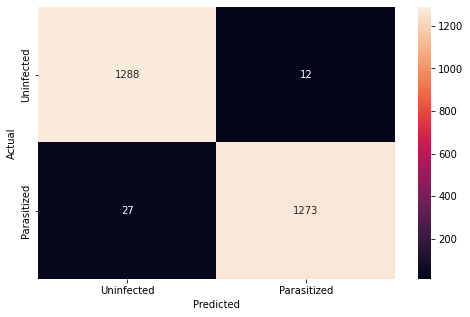

In [21]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [22]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

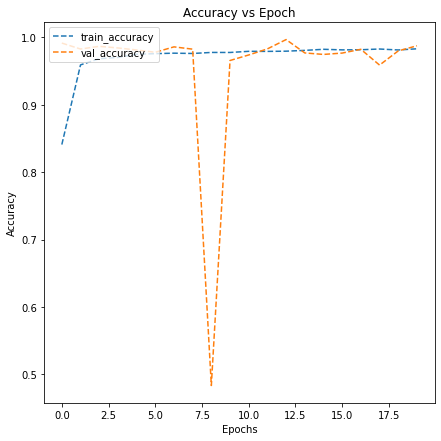

In [23]:
plot_accuracy(history)